<a href="https://colab.research.google.com/github/durgeshgitup/MA22C013_2023_PL/blob/main/Assignments/Assignment_3/Rise_of_c02_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import urllib.request

data_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
data_file = "co2_mm_mlo.txt"

urllib.request.urlretrieve(data_url, data_file)

('co2_mm_mlo.txt', <email.message.Message at 0x78390c33a350>)

#Data munging and extracting data arrays:

In [9]:
import numpy as np

# Load data, skip header rows, and use NaN for missing values
data = np.genfromtxt(data_file, skip_header=72, usecols=(0, 1, 3), missing_values="-999.99", filling_values=np.nan)

# Extract year, month, and CO2 average columns
year = data[:, 0].astype(int)
month = data[:, 1].astype(int)
co2_average = data[:, 2]

In [10]:
data

array([[1959.  ,    5.  ,  318.29],
       [1959.  ,    6.  ,  318.15],
       [1959.  ,    7.  ,  316.54],
       ...,
       [2023.  ,    5.  ,  424.  ],
       [2023.  ,    6.  ,  423.68],
       [2023.  ,    7.  ,  422.14]])

#Extract monthly averages:

In [11]:
from collections import defaultdict

# Create a dictionary to store monthly averages
monthly_averages = defaultdict(list)

for i in range(len(data)):
    key = (year[i], month[i])
    monthly_averages[key].append(co2_average[i])

# Calculate actual monthly averages
for key, values in monthly_averages.items():
    monthly_averages[key] = np.mean(values)

#Plot monthly averages as a function of time:

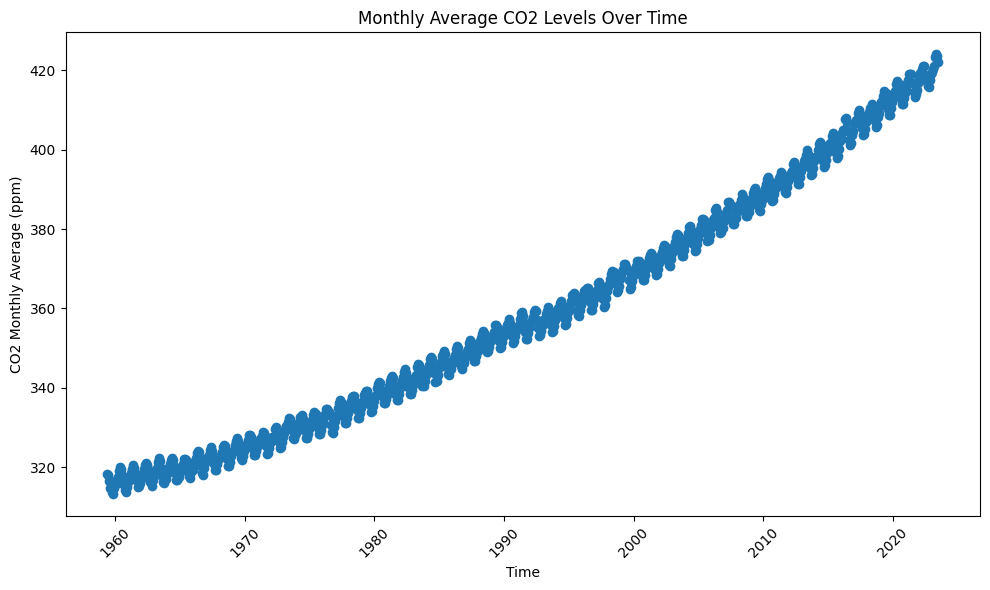

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime

# Convert year and month to datetime objects
dates = [datetime(year=y, month=m, day=15) for y, m in monthly_averages.keys()]

plt.figure(figsize=(10, 6))
plt.plot(dates, list(monthly_averages.values()), marker='o')
plt.xlabel('Time')
plt.ylabel('CO2 Monthly Average (ppm)')
plt.title('Monthly Average CO2 Levels Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Estimate the rate of change of CO2:

In [13]:
from scipy.interpolate import interp1d

# Interpolate the data to generate values at equispaced time intervals
interp_func = interp1d([date.timestamp() for date in dates], list(monthly_averages.values()), kind='linear')
equispaced_dates = np.linspace(min([date.timestamp() for date in dates]), max([date.timestamp() for date in dates]), num=len(dates))
equispaced_co2 = interp_func(equispaced_dates)

# Calculate the rate of change using differences between equispaced values
rate_of_change = np.diff(equispaced_co2) / np.diff(equispaced_dates)

#Plot the estimate of the rate of change as a function of time:

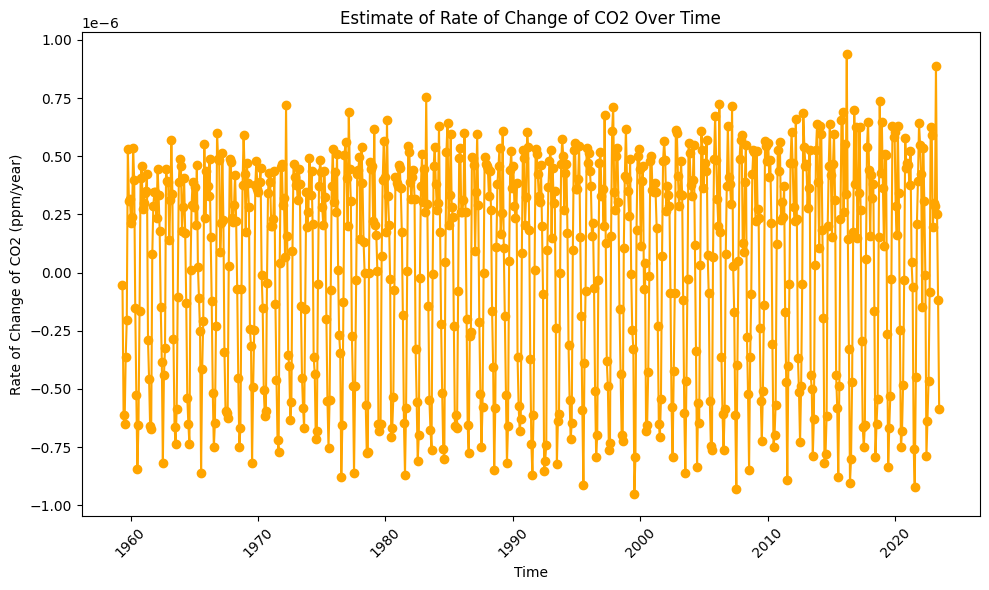

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(dates[:-1], rate_of_change, marker='o', color='orange')
plt.xlabel('Time')
plt.ylabel('Rate of Change of CO2 (ppm/year)')
plt.title('Estimate of Rate of Change of CO2 Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()